# Getting the Data 

In [1]:
import facebook

In [2]:

token = '465406930468068|8e5e0af18cdd664fb0f0126686b3c821'

graph = facebook.GraphAPI(access_token=token, version='2.7')


In [3]:
graph_dict = graph.get_connections('24369314439', connection_name='posts')

In [4]:
graph_dict.keys()

[u'paging', u'data']

In [5]:
data = graph_dict['data']

In [6]:
import pandas as pd
df = pd.DataFrame(data)

## via requests 

In [77]:
import json

In [248]:

# In[113]:


import requests
import json
from pprint import pprint
from datetime import date
from datetime import datetime
from datetime import timedelta

# In[114]:


page_id = '24369314439'
token = '465406930468068|8e5e0af18cdd664fb0f0126686b3c821'

feed = requests.get('https://graph.facebook.com/v2.9/' + page_id + '/posts?access_token=' + token + '&limit=100&fields=message,id,from,type,picture,link,created_time,updated_time')


# In[115]:


posts = []
ninety_days = timedelta(days=90)
start_date = date.today() - ninety_days
feed_json = feed.json()
print feed_json['paging']['next']


# In[116]:


posts = feed_json['data']
# start_date needs a time also
start_date = datetime.combine(start_date, datetime.min.time())
pprint(start_date)
pprint(feed_json['data'][-1]['created_time'])
#pprint(datetime.parse(posts['data'][-1]['created_time']))
last_date = datetime.combine(date.today(), datetime.min.time())
while (last_date > start_date):
    last_date = datetime.strptime(feed_json['data'][-1]['created_time'][:-5], "%Y-%m-%dT%H:%M:%S" )
    pprint(last_date)
    feed = requests.get(feed_json['paging']['next'])
    feed_json = feed.json()
    posts += feed_json['data']
    #pprint(feed_json['data'][-1])
pprint(posts)
    

https://graph.facebook.com/v2.9/24369314439/posts?access_token=465406930468068%7C8e5e0af18cdd664fb0f0126686b3c821&fields=message%2Cid%2Cfrom%2Ctype%2Cpicture%2Clink%2Ccreated_time%2Cupdated_time&limit=100&after=Q2c4U1pXNTBYM0YxWlhKNVgzTjBiM0o1WDJsa0R5QXlORE0yT1RNeE5EUXpPVG90TkRZAME1UVTBORFUwTXpFMk5qUXdNREE0TkE4TVlYQnBYM04wYjNKNVgybGtEeDB5TkRNMk9UTXhORFF6T1Y4eE1ERTFORGt5TnpJMk56ZAzBPVFEwTUE4RWRHbHRaUVpaTjZAGb0FRPT0ZD
datetime.datetime(2017, 3, 14, 0, 0)
u'2017-06-07T06:47:04+0000'
datetime.datetime(2017, 6, 7, 6, 47, 4)
datetime.datetime(2017, 6, 2, 16, 0, 59)
datetime.datetime(2017, 5, 29, 0, 32)
datetime.datetime(2017, 5, 23, 18, 34, 18)
datetime.datetime(2017, 5, 19, 2, 25, 45)
datetime.datetime(2017, 5, 14, 9, 13, 27)
datetime.datetime(2017, 5, 9, 3, 41)
datetime.datetime(2017, 5, 3, 16, 33, 13)
datetime.datetime(2017, 4, 28, 11, 34, 42)
datetime.datetime(2017, 4, 23, 12, 23, 21)
datetime.datetime(2017, 4, 18, 5, 2, 58)
datetime.datetime(2017, 4, 12, 23, 26, 19)
datetime.datetime(20

In [249]:
df = pd.DataFrame(posts)

The data as a table.

In [250]:
df.head()

,created_time,from,id,link,message,picture,type,updated_time
0,2017-06-12T13:12:39+0000,"{u'name': u'DW News', u'id': u'24369314439'}",24369314439_10154944642344440,https://www.facebook.com/deutschewellenews/videos/10154944642344440/,A China Eastern flight bound for Shanghai had to fly back to Sydney for an emergency landing after an enormous hole tore through the plane's left engine 😲,https://scontent.xx.fbcdn.net/v/t15.0-10/s130x130/19143516_10154944657439440_5282810667433197568_n.jpg?oh=2b82db853e939bce87a0497c1a7c33c2&oe=59E0F38C,video,2017-06-12T14:01:58+0000
1,2017-06-12T11:50:24+0000,"{u'name': u'DW News', u'id': u'24369314439'}",24369314439_10154944511439440,https://www.facebook.com/deutschewellenews/photos/a.10150647923819440.392236.24369314439/10154944510409440/?type=3,"Germany Decides: On the road to the elections\n\nSix cities, two reporters, one question: What matters most to Germans ahead of the 2017 federal elections? DW reporters Sumi Somaskanda and Nina Ha...",https://scontent.xx.fbcdn.net/v/t1.0-0/s130x130/19030594_10154944510409440_3964107228294447201_n.png?oh=fb82921ad021c8cb66db7b138a45a893&oe=59A623D7,photo,2017-06-12T12:19:53+0000
2,2017-06-12T11:09:00+0000,"{u'name': u'DW News', u'id': u'24369314439'}",24369314439_10154944432029440,http://www.dw.com/en/germanydecides-on-the-road-to-the-elections/a-39146595,"Six cities, two reporters, one question: What matters most to Germans ahead of the 2017 federal elections? Sumi Somaskanda and Nina Haase are hitting the road to find out. Tune in to our Facebook ...",https://scontent.xx.fbcdn.net/v/t45.1600-4/c10.0.130.130/p130x130/19033526_23842611865180222_9014843394584739840_n.png?oh=21a5ef57208a66d5c232821bc4d2b68a&oe=59A7B69B,link,2017-06-12T13:21:45+0000
3,2017-06-12T09:46:14+0000,"{u'name': u'DW News', u'id': u'24369314439'}",24369314439_10154944302089440,http://www.dw.com/en/russian-opposition-leader-alexei-navalny-to-lead-anti-kremlin-russia-day-protests/a-39205818?maca=en-Facebook-dw,UPDATE: Russian opposition leader Alexei Navalny arrested ahead of anti-Kremlin protests. Supporters of Putin-critic Navalny are expected to mark Monday's public holiday with over 200 rallies nati...,https://scontent.xx.fbcdn.net/v/t39.2147-6/c8.0.130.130/p130x130/18928736_10154944299234440_2331183101511729152_n.jpg?oh=8822a15e24588e2d03f1c1701889d1d5&oe=59DFFBA7,link,2017-06-12T13:34:39+0000
4,2017-06-12T08:39:39+0000,"{u'name': u'DW News', u'id': u'24369314439'}",24369314439_10154944182269440,http://www.dw.com/en/top-stories/german-elections/s-100649?maca=en-Facebook-dw,For all of our coverage in the run-up to the German election visit www.dw.com/germanelections and follow the hashtag #GermanyDecides.,https://scontent.xx.fbcdn.net/v/t45.1600-4/c50.0.130.130/p130x130/19033224_23842611730470222_910704118119530496_n.png?oh=e6ae89d84d9a029be67a373072baa644&oe=59A45342,link,2017-06-12T13:41:52+0000


In [251]:
df.shape

(2100, 8)

In [252]:
df['time'] = pd.to_datetime(df.created_time)

In [253]:
df.time

0      2017-06-12 13:12:39
1      2017-06-12 11:50:24
2      2017-06-12 11:09:00
3      2017-06-12 09:46:14
4      2017-06-12 08:39:39
5      2017-06-12 07:41:03
6      2017-06-12 06:39:55
7      2017-06-12 05:47:15
8      2017-06-12 04:47:00
9      2017-06-12 04:32:28
10     2017-06-12 04:03:00
11     2017-06-12 02:03:00
12     2017-06-12 00:03:00
13     2017-06-11 22:03:00
14     2017-06-11 20:03:00
15     2017-06-11 18:03:00
16     2017-06-11 15:53:04
17     2017-06-11 15:09:07
18     2017-06-11 14:23:31
19     2017-06-11 13:21:48
20     2017-06-11 12:23:12
21     2017-06-11 11:38:34
22     2017-06-11 10:47:57
23     2017-06-11 09:49:59
24     2017-06-11 09:03:00
25     2017-06-11 07:02:00
26     2017-06-11 05:03:00
27     2017-06-11 03:01:00
28     2017-06-11 01:02:00
29     2017-06-10 23:02:00
               ...        
2070   2017-03-08 10:30:51
2071   2017-03-08 09:42:39
2072   2017-03-08 08:16:29
2073   2017-03-08 07:09:19
2074   2017-03-08 06:03:46
2075   2017-03-08 04:31:31
2

# Named Entity Recognition 

In [10]:
import spacy
nlp = spacy.load('en')


In [29]:
import re

In [256]:
# clean the text

def preprocess_text(text):
    out = text
    try:
        out = text.replace(u"'s", u"")
        out = out.replace(u"-", u" ")
    except:
        pass
    return out

In [258]:
# extract named entities

def get_named_entities(text):
    out = []
    try:
        doc = nlp(text)
        out = [{'label':ent.label_, 'text':ent.text} for ent in doc.ents]
    except:
        pass
    return out

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 9 columns):
created_time    2100 non-null object
from            2100 non-null object
id              2100 non-null object
link            2099 non-null object
message         2089 non-null object
picture         2099 non-null object
type            2100 non-null object
updated_time    2100 non-null object
time            2100 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(8)
memory usage: 147.7+ KB


In [259]:
# apply functions from above

df['cleaned_text'] = df.message.apply(preprocess_text)
df['named_entities'] = df.cleaned_text.apply(get_named_entities)

In [260]:
df.message.iloc[3]

u"UPDATE: Russian opposition leader Alexei Navalny arrested ahead of anti-Kremlin protests. Supporters of Putin-critic Navalny are expected to mark Monday's public holiday with over 200 rallies nationwide."

In [261]:
df.cleaned_text[3]

u'UPDATE: Russian opposition leader Alexei Navalny arrested ahead of anti Kremlin protests. Supporters of Putin critic Navalny are expected to mark Monday public holiday with over 200 rallies nationwide.'

In [262]:
df.named_entities[0]

[{'label': u'GPE', 'text': u'China'},
 {'label': u'GPE', 'text': u'Shanghai'},
 {'label': u'GPE', 'text': u'Sydney'}]

Get Persons

In [263]:
df['Persons'] = df.named_entities.apply(lambda x: [ne['text'] for ne in x if ne['label'] == 'PERSON'])

In [264]:
df.Persons

0                                   []
1        [Sumi Somaskanda, Nina Haase]
2        [Sumi Somaskanda, Nina Haase]
3                     [Alexei Navalny]
4                                   []
5                         [Poroshenko]
6                            [Theresa]
7                                   []
8                                   []
9                    [Emmanuel Macron]
10                                  []
11                                  []
12                     [Gero Schliess]
13                                  []
14                                  []
15                                  []
16                     [Angela Merkel]
17                                  []
18                   [Donald J. Trump]
19                        [Poroshenko]
20                                  []
21                                  []
22                                  []
23                      [Erna Solberg]
24                                  []
25                       

In [265]:
from geotext import GeoText
import pycountry

In [266]:
places = GeoText(df.cleaned_text[0])
print places.cities
# "London"

print GeoText('French').country_mentions.keys()


[u'Shanghai', u'Sydney']
['FR']


In [267]:
df.cleaned_text[0]

u'A China Eastern flight bound for Shanghai had to fly back to Sydney for an emergency landing after an enormous hole tore through the plane left engine \U0001f632'

In [268]:
df.cleaned_text[3]

u'UPDATE: Russian opposition leader Alexei Navalny arrested ahead of anti Kremlin protests. Supporters of Putin critic Navalny are expected to mark Monday public holiday with over 200 rallies nationwide.'

In [269]:
def countries_from_nes(ne_list):
    cities = []
    countries = []
    for ne in ne_list:
        if ne['label'] in ['NORP', 'LOC', 'GPE']:
            places = GeoText(ne['text'])
            cities = cities + places.cities
            countries = countries + places.country_mentions.keys()
    return cities, countries

In [270]:
cities = []
countries = []
for ne in df.named_entities:
    cities_plus, countries_plus = countries_from_nes(ne)
    cities = cities + cities_plus
    countries = countries + countries_plus

In [271]:
cities

[u'Shanghai',
 u'Sydney',
 u'Dresden',
 u'Moscow',
 u'Dublin',
 u'Berlin',
 u'Moscow',
 u'Dresden',
 u'Lexington',
 u'Sunderland',
 u'Sunderland',
 u'Sunderland',
 u'Palestine',
 u'Tel Aviv',
 u'Baghdad',
 u'Jerusalem',
 u'London',
 u'Paris',
 u'Doha',
 u'Berlin',
 u'Sydney',
 u'Washington',
 u'Caracas',
 u'London',
 u'Berlin',
 u'Berlin',
 u'Berlin',
 u'Ankara',
 u'London',
 u'Manchester',
 u'Beijing',
 u'London',
 u'London',
 u'London',
 u'London',
 u'Delaware',
 u'London',
 u'Pittsburgh',
 u'Kabul',
 u'Paris',
 u'Homs',
 u'Paris',
 u'Paris',
 u'Detroit',
 u'Michigan',
 u'Paris',
 u'Paris',
 u'Paris',
 u'Paris',
 u'New Delhi',
 u'Kabul',
 u'Manchester',
 u'Kabul',
 u'Berlin',
 u'Dresden',
 u'Panama City',
 u'Washington',
 u'Wolfsburg',
 u'Marawi City',
 u'Manchester',
 u'Prague',
 u'Athens',
 u'Cairo',
 u'Cairo',
 u'Kabul',
 u'Berlin',
 u'Manchester',
 u'Manchester',
 u'Berlin',
 u'Manchester',
 u'Manchester',
 u'Brussels',
 u'Manchester',
 u'Berlin',
 u'Miami',
 u'Berlin',
 u'Manche

In [272]:
countries

['CN',
 'CN',
 'CA',
 'DE',
 'RU',
 'DE',
 'US',
 'US',
 'PE',
 'FR',
 'DE',
 'MA',
 'JO',
 'DE',
 'QA',
 'RU',
 'XK',
 'HK',
 'CN',
 'US',
 'DE',
 'IT',
 'DE',
 'CN',
 'FI',
 'IN',
 'PK',
 'RU',
 'DE',
 'DE',
 'ES',
 'GE',
 'DE',
 'JO',
 'GB',
 'LU',
 'EE',
 'US',
 'GB',
 'DE',
 'GB',
 'GB',
 'RU',
 'EG',
 'EG',
 'SY',
 'IL',
 'US',
 'IL',
 'DE',
 'DE',
 'IQ',
 'CN',
 'DE',
 'GB',
 'IL',
 'PS',
 'IL',
 'IL',
 'PS',
 'RU',
 'QA',
 'IL',
 'TR',
 'JO',
 'QA',
 'AF',
 'DE',
 'PK',
 'GB',
 'PK',
 'GB',
 'US',
 'BR',
 'QA',
 'QA',
 'IR',
 'TR',
 'CZ',
 'CN',
 'QA',
 'IN',
 'QA',
 'DE',
 'DE',
 'DE',
 'CA',
 'RU',
 'IN',
 'US',
 'VE',
 'US',
 'MX',
 'MX',
 'GB',
 'GB',
 'PK',
 'LY',
 'MA',
 'IL',
 'DE',
 'DE',
 'DE',
 'SA',
 'BH',
 'EG',
 'YE',
 'AF',
 'AF',
 'DE',
 'TR',
 'IL',
 'DE',
 'GB',
 'US',
 'BG',
 'RU',
 'LT',
 'TW',
 'CN',
 'CN',
 'DE',
 'DE',
 'JP',
 'KP',
 'GB',
 'BH',
 'MA',
 'GR',
 'PL',
 'GB',
 'GB',
 'GB',
 'GB',
 'US',
 'AQ',
 'GB',
 'IN',
 'GB',
 'US',
 'DE',
 'DE',
 'TR',

In [274]:
def alpha2_to_alpha3(old_key):
    if old_key == "XK":
        new_key = "RKS"
        name = 'Kosovo'
    else:
        country = pycountry.countries.get(alpha_2=old_key)
        new_key = country.alpha_3
        name = country.name
    return new_key, name

In [299]:
countries_new = []
country_names = []
for c in countries:
    a3, name = alpha2_to_alpha3(c)
    countries_new.append(a3)
    country_names.append(name)
print countries_new

[u'CHN', u'CHN', u'CAN', u'DEU', u'RUS', u'DEU', u'USA', u'USA', u'PER', u'FRA', u'DEU', u'MAR', u'JOR', u'DEU', u'QAT', u'RUS', 'RKS', u'HKG', u'CHN', u'USA', u'DEU', u'ITA', u'DEU', u'CHN', u'FIN', u'IND', u'PAK', u'RUS', u'DEU', u'DEU', u'ESP', u'GEO', u'DEU', u'JOR', u'GBR', u'LUX', u'EST', u'USA', u'GBR', u'DEU', u'GBR', u'GBR', u'RUS', u'EGY', u'EGY', u'SYR', u'ISR', u'USA', u'ISR', u'DEU', u'DEU', u'IRQ', u'CHN', u'DEU', u'GBR', u'ISR', u'PSE', u'ISR', u'ISR', u'PSE', u'RUS', u'QAT', u'ISR', u'TUR', u'JOR', u'QAT', u'AFG', u'DEU', u'PAK', u'GBR', u'PAK', u'GBR', u'USA', u'BRA', u'QAT', u'QAT', u'IRN', u'TUR', u'CZE', u'CHN', u'QAT', u'IND', u'QAT', u'DEU', u'DEU', u'DEU', u'CAN', u'RUS', u'IND', u'USA', u'VEN', u'USA', u'MEX', u'MEX', u'GBR', u'GBR', u'PAK', u'LBY', u'MAR', u'ISR', u'DEU', u'DEU', u'DEU', u'SAU', u'BHR', u'EGY', u'YEM', u'AFG', u'AFG', u'DEU', u'TUR', u'ISR', u'DEU', u'GBR', u'USA', u'BGR', u'RUS', u'LTU', u'TWN', u'CHN', u'CHN', u'DEU', u'DEU', u'JPN', u'PRK', 

In [276]:
len(country_names)

1489

In [277]:
len(countries_new)

1489

In [278]:
country_names

[u'China',
 u'China',
 u'Canada',
 u'Germany',
 u'Russian Federation',
 u'Germany',
 u'United States',
 u'United States',
 u'Peru',
 u'France',
 u'Germany',
 u'Morocco',
 u'Jordan',
 u'Germany',
 u'Qatar',
 u'Russian Federation',
 'Kosovo',
 u'Hong Kong',
 u'China',
 u'United States',
 u'Germany',
 u'Italy',
 u'Germany',
 u'China',
 u'Finland',
 u'India',
 u'Pakistan',
 u'Russian Federation',
 u'Germany',
 u'Germany',
 u'Spain',
 u'Georgia',
 u'Germany',
 u'Jordan',
 u'United Kingdom',
 u'Luxembourg',
 u'Estonia',
 u'United States',
 u'United Kingdom',
 u'Germany',
 u'United Kingdom',
 u'United Kingdom',
 u'Russian Federation',
 u'Egypt',
 u'Egypt',
 u'Syrian Arab Republic',
 u'Israel',
 u'United States',
 u'Israel',
 u'Germany',
 u'Germany',
 u'Iraq',
 u'China',
 u'Germany',
 u'United Kingdom',
 u'Israel',
 u'Palestine, State of',
 u'Israel',
 u'Israel',
 u'Palestine, State of',
 u'Russian Federation',
 u'Qatar',
 u'Israel',
 u'Turkey',
 u'Jordan',
 u'Qatar',
 u'Afghanistan',
 u'Germa

In [300]:
df_countries = pd.DataFrame(Counter(countries_new).most_common())
df_countries.columns = ['a3', 'number']
df_countries.head()

,a3,number
0,DEU,348
1,USA,112
2,TUR,109
3,RUS,77
4,FRA,75


In [286]:
df_countries_2 = pd.DataFrame(Counter(country_names).most_common())
df_countries_2.columns = ['name', 'number']
df_countries_2.head()

,name,number
0,Germany,348
1,United States,112
2,Turkey,109
3,Russian Federation,77
4,France,75


In [287]:
df_countries = pd.merge(df_countries, df_countries_2, how='inner')
df_countries.head()

,a3,number,name
0,DEU,348,Germany
1,USA,112,United States
2,TUR,109,Turkey
3,RUS,77,Russian Federation
4,FRA,75,France


In [288]:
df_countries.columns = ['id', 'population', 'name']

In [147]:
pd.options.display.max_colwidth=200

In [283]:
df[['cleaned_text', 'named_entities']].head(30)

,cleaned_text,named_entities
0,A China Eastern flight bound for Shanghai had to fly back to Sydney for an emergency landing after an enormous hole tore through the plane left engine 😲,"[{u'text': u'China', u'label': u'GPE'}, {u'text': u'Shanghai', u'label': u'GPE'}, {u'text': u'Sydney', u'label': u'GPE'}]"
1,"Germany Decides: On the road to the elections\n\nSix cities, two reporters, one question: What matters most to Germans ahead of the 2017 federal elections? DW reporters Sumi Somaskanda and Nina Ha...","[{u'text': u' ', u'label': u'CARDINAL'}, {u'text': u'Six', u'label': u'CARDINAL'}, {u'text': u'two', u'label': u'CARDINAL'}, {u'text': u'one', u'label': u'CARDINAL'}, {u'text': u'Germans', u'labe..."
2,"Six cities, two reporters, one question: What matters most to Germans ahead of the 2017 federal elections? Sumi Somaskanda and Nina Haase are hitting the road to find out. Tune in to our Facebook ...","[{u'text': u'Six', u'label': u'CARDINAL'}, {u'text': u'two', u'label': u'CARDINAL'}, {u'text': u'one', u'label': u'CARDINAL'}, {u'text': u'Germans', u'label': u'NORP'}, {u'text': u'2017', u'label'..."
3,UPDATE: Russian opposition leader Alexei Navalny arrested ahead of anti Kremlin protests. Supporters of Putin critic Navalny are expected to mark Monday public holiday with over 200 rallies nation...,"[{u'text': u'Russian', u'label': u'NORP'}, {u'text': u'Alexei Navalny', u'label': u'PERSON'}, {u'text': u'Kremlin', u'label': u'ORG'}, {u'text': u'Putin', u'label': u'GPE'}, {u'text': u'Navalny', ..."
4,For all of our coverage in the run up to the German election visit www.dw.com/germanelections and follow the hashtag #GermanyDecides.,"[{u'text': u'German', u'label': u'NORP'}, {u'text': u'GermanyDecides', u'label': u'ORG'}]"
5,"Cheering, hundreds entered the EU in what President Poroshenko called a symbolic ""final breakaway"" from Moscow.","[{u'text': u'hundreds', u'label': u'CARDINAL'}, {u'text': u'EU', u'label': u'ORG'}, {u'text': u'Poroshenko', u'label': u'PERSON'}, {u'text': u'Moscow', u'label': u'GPE'}]"
6,UK PM Theresa May plan to recruit Northern Ireland backers to stay in power has raised concerns in Dublin. Her cabinet reshuffle may signal a more open stance on Brexit talks with Europe.,"[{u'text': u'UK', u'label': u'GPE'}, {u'text': u'Theresa', u'label': u'PERSON'}, {u'text': u'Northern Ireland', u'label': u'LOC'}, {u'text': u'Dublin', u'label': u'GPE'}, {u'text': u'Brexit', u'la..."
7,The first bicycle ride took place 200 years ago.\n\nAny idea where? 🚲,"[{u'text': u'first', u'label': u'ORDINAL'}, {u'text': u'200 years ago', u'label': u'DATE'}]"
8,Foreigners released from prison in Peru aren't always free to leave the country; it takes them more than six months to get their exit papers and leaves them prone to more problems.,"[{u'text': u'Peru', u'label': u'GPE'}, {u'text': u'more than six months', u'label': u'DATE'}]"
9,Preliminary results have shown French President Emmanuel Macron political startup well ahead of traditional parties with over 30 percent in the first round of voting. The center right Republicans ...,"[{u'text': u'French', u'label': u'NORP'}, {u'text': u'Emmanuel Macron', u'label': u'PERSON'}, {u'text': u'over 30 percent', u'label': u'PERCENT'}, {u'text': u'first', u'label': u'ORDINAL'}, {u'tex..."


In [292]:
df_cities = pd.DataFrame(Counter(cities).most_common())
df_cities.columns = ['city', 'number']
df_cities.head()

,city,number
0,Berlin,43
1,London,19
2,Paris,18
3,Pyongyang,16
4,Washington,13


In [295]:
df_cities.drop_duplicates(inplace=True)

In [302]:
df_countries.to_csv('countries.csv', index=False, encoding='utf-8')

In [293]:
import seaborn as sns

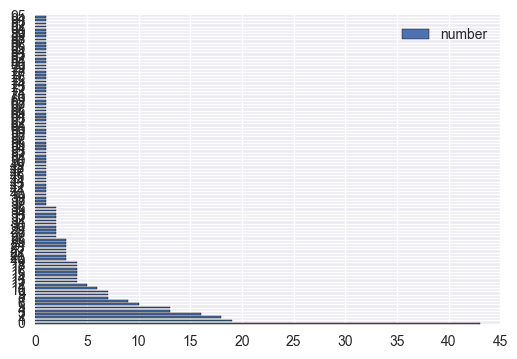

In [296]:
%matplotlib inline

df_cities.plot(kind='barh')

In [301]:
df_countries

,a3,number
0,DEU,348
1,USA,112
2,TUR,109
3,RUS,77
4,FRA,75
5,GBR,59
6,CHN,55
7,SYR,49
8,PRK,43
9,ISR,35
